# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key
#from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
# note: run pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
api_key

'4f4e8ff1e65d570d34f6275958bc9ef1'

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
no_cities = len(cities)
print ("***" + str(no_cities) + " to be processed***")

***610 to be processed***


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
ID_df = []
city_df = []
cloud_df = []
country_df = []
date_df = []
humidity_df = []
lat_df = []
lon_df = []
maxtemp_df = []
wind_df = []
error_cities = []
error_countries = []


#for i in cities:
for  i in range(len(cities)) :
    try: 
        c = cities[i]
        print("Processing Record " + str(i) + " of Set 1 | " + c)
        url = "https://api.openweathermap.org/data/2.5/weather?q=" + cities[i] + "," + countries[i]+"&APPID="+ api_key
        JSONContent = requests.get(url).json()
        #JSONContent = requests.get("https://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=4f4e8ff1e65d570d34f6275958bc9ef1" ).json()
        #print(requests.get(url).json())
        ID_df.append(JSONContent['id'])
        city_df.append(JSONContent['name'])
        cloud_df.append(JSONContent['clouds']['all'])
        country_df.append(countries[i])
        date_df.append(JSONContent['dt'])
        humidity_df.append(JSONContent['main']['humidity'])
        lat_df.append(JSONContent['coord']['lat'])
        lon_df.append(JSONContent['coord']['lon'])
        maxtemp_df.append((JSONContent['main']['temp_max']) * (9/5) - (459.67))
        wind_df.append(JSONContent['wind']['speed'])
    except: 
        error_cities.append(cities[i])
        error_countries.append(countries[i])
        print("****Failed**** Processing Record " + str(i) + " of Set 1 | " + c)



Processing Record 0 of Set 1 | cape town
Processing Record 1 of Set 1 | avera
****Failed**** Processing Record 1 of Set 1 | avera
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | barentsburg
****Failed**** Processing Record 3 of Set 1 | barentsburg
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | lodwar
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | vamdrup
Processing Record 13 of Set 1 | kloulklubed
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | sola
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | broome
Processing Record 18 of Set 1 | mataura
****Failed**** Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | kavieng
Processing Record 20 o

****Failed**** Processing Record 166 of Set 1 | ksenyevka
Processing Record 167 of Set 1 | belgrade
Processing Record 168 of Set 1 | saint-pierre
Processing Record 169 of Set 1 | morgan city
Processing Record 170 of Set 1 | iberia
Processing Record 171 of Set 1 | palabuhanratu
****Failed**** Processing Record 171 of Set 1 | palabuhanratu
Processing Record 172 of Set 1 | ketchikan
Processing Record 173 of Set 1 | ambulu
Processing Record 174 of Set 1 | shu
Processing Record 175 of Set 1 | sobolevo
Processing Record 176 of Set 1 | mackay
Processing Record 177 of Set 1 | copiapo
Processing Record 178 of Set 1 | camana
****Failed**** Processing Record 178 of Set 1 | camana
Processing Record 179 of Set 1 | nueva loja
Processing Record 180 of Set 1 | mar del plata
Processing Record 181 of Set 1 | dombarovskiy
Processing Record 182 of Set 1 | puerto narino
Processing Record 183 of Set 1 | utiroa
****Failed**** Processing Record 183 of Set 1 | utiroa
Processing Record 184 of Set 1 | port augus

Processing Record 337 of Set 1 | nemuro
Processing Record 338 of Set 1 | constitucion
Processing Record 339 of Set 1 | herat
Processing Record 340 of Set 1 | la ronge
Processing Record 341 of Set 1 | amderma
****Failed**** Processing Record 341 of Set 1 | amderma
Processing Record 342 of Set 1 | araouane
Processing Record 343 of Set 1 | kabalo
Processing Record 344 of Set 1 | killybegs
Processing Record 345 of Set 1 | outjo
Processing Record 346 of Set 1 | bathsheba
Processing Record 347 of Set 1 | kabinda
Processing Record 348 of Set 1 | vasudevanallur
Processing Record 349 of Set 1 | argelia
Processing Record 350 of Set 1 | tautira
Processing Record 351 of Set 1 | damghan
Processing Record 352 of Set 1 | sitrah
Processing Record 353 of Set 1 | vilhena
Processing Record 354 of Set 1 | south sioux city
Processing Record 355 of Set 1 | gondanglegi
Processing Record 356 of Set 1 | northam
Processing Record 357 of Set 1 | kanashevo
Processing Record 358 of Set 1 | galiwinku
****Failed****

Processing Record 500 of Set 1 | nelson
Processing Record 501 of Set 1 | heishan
Processing Record 502 of Set 1 | meyungs
****Failed**** Processing Record 502 of Set 1 | meyungs
Processing Record 503 of Set 1 | manokwari
Processing Record 504 of Set 1 | nigde
Processing Record 505 of Set 1 | grandview
Processing Record 506 of Set 1 | flin flon
Processing Record 507 of Set 1 | ingham
Processing Record 508 of Set 1 | saint-francois
Processing Record 509 of Set 1 | toungoo
****Failed**** Processing Record 509 of Set 1 | toungoo
Processing Record 510 of Set 1 | odoyev
Processing Record 511 of Set 1 | ossora
Processing Record 512 of Set 1 | kokoda
Processing Record 513 of Set 1 | challapata
Processing Record 514 of Set 1 | tieling
Processing Record 515 of Set 1 | pryazha
Processing Record 516 of Set 1 | vestmanna
Processing Record 517 of Set 1 | atasu
Processing Record 518 of Set 1 | puerto cabezas
Processing Record 519 of Set 1 | gravelbourg
Processing Record 520 of Set 1 | dunedin
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
data = {"City ID": ID_df, "City": city_df, "Cloudiness": cloud_df, "Country": country_df, "Date": date_df, "Humidity": humidity_df, "Lat": lat_df, "Lng": lon_df, "Max Temp": maxtemp_df, "Wind Speed": wind_df}
weather_df = pd.DataFrame(data) 
weather_df.head()
weather_df.to_csv(r'Weather_Geetha.csv')



In [10]:
data2 = {"Country": error_countries, "City": error_cities}
error_df = pd.DataFrame(data2) 
error_df.head()

,Country,City
0,pf,avera
1,sj,barentsburg
2,pf,mataura
3,in,tekkalakota
4,ru,mys shmidta


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

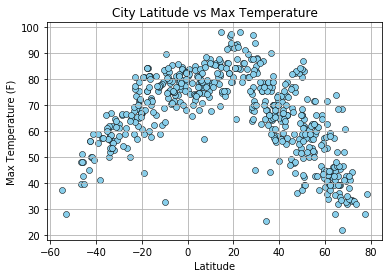

<Figure size 432x288 with 0 Axes>

In [11]:

x = weather_df["Lat"].values
y = weather_df["Max Temp"].values

plt.scatter(x, y,c="skyblue",linewidth=.5, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")

plt.grid(True)
plt.show()

# Save Figure
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")

#### Latitude vs. Humidity Plot

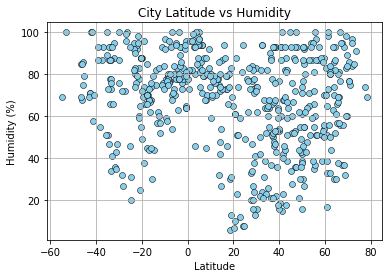

<Figure size 432x288 with 0 Axes>

In [12]:
x = weather_df["Lat"].values
y = weather_df["Humidity"].values

plt.scatter(x, y,c="skyblue",linewidth=.5, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")

plt.grid(True)
plt.show()

# Save Figure
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")

#### Latitude vs. Cloudiness Plot

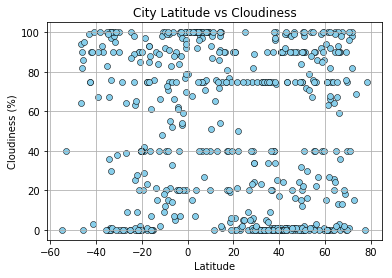

<Figure size 432x288 with 0 Axes>

In [13]:
x = weather_df["Lat"].values
y = weather_df["Cloudiness"].values

plt.scatter(x, y,c="skyblue",linewidth=.5, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")

plt.grid(True)
plt.show()

# Save Figure
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")

#### Latitude vs. Wind Speed Plot

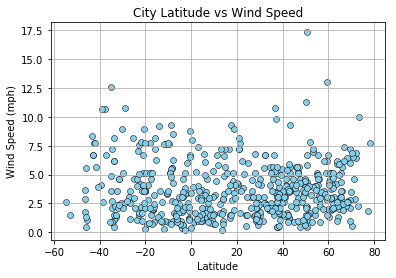

<Figure size 432x288 with 0 Axes>

In [14]:
x = weather_df["Lat"].values
y = weather_df["Wind Speed"].values

plt.scatter(x, y,c="skyblue",linewidth=.5, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")

plt.grid(True)
plt.show()

# Save Figure
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")